In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import pathlib

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout, Flatten,Activation, BatchNormalization,MaxPooling2D
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.callbacks import EarlyStopping


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

2024-02-12 14:04:01.636155: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-12 14:04:01.636398: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-12 14:04:01.803359: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
images_dir = pathlib.Path('/kaggle/input/fruits-dataset-images/images/') 

In [3]:
fruit_images_dict = {
    'mango': list(images_dir.glob('mango fruit/*')),
    'apple': list(images_dir.glob('apple fruit/*'))
}

fruit_labels_dict = {
    'mango': 0,
    'apple': 1
}

In [4]:
fruit_images_dict['mango'][:5]

[PosixPath('/kaggle/input/fruits-dataset-images/images/mango fruit/Image_22.jpg'),
 PosixPath('/kaggle/input/fruits-dataset-images/images/mango fruit/Image_4.jpg'),
 PosixPath('/kaggle/input/fruits-dataset-images/images/mango fruit/Image_12.jpg'),
 PosixPath('/kaggle/input/fruits-dataset-images/images/mango fruit/Image_16.jpg'),
 PosixPath('/kaggle/input/fruits-dataset-images/images/mango fruit/Image_2.jpg')]

In [5]:
fruit_images_dict['apple'][:5]

[PosixPath('/kaggle/input/fruits-dataset-images/images/apple fruit/Image_22.jpg'),
 PosixPath('/kaggle/input/fruits-dataset-images/images/apple fruit/Image_34.jpeg'),
 PosixPath('/kaggle/input/fruits-dataset-images/images/apple fruit/Image_13.png'),
 PosixPath('/kaggle/input/fruits-dataset-images/images/apple fruit/Image_4.jpg'),
 PosixPath('/kaggle/input/fruits-dataset-images/images/apple fruit/Image_12.jpg')]

In [6]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_CHANNELS = 3
X, Y = [], []

for fruit_name, images in fruit_images_dict.items():
    print(fruit_name)
    for image in images:
        img = cv2.imread(str(image))
        if isinstance(img,type(None)): 
            #print('image not found')
            continue
            
        elif ((img.shape[0] >= IMAGE_HEIGHT) and  (img.shape[1] >=IMAGE_WIDTH)):
            resized_img = cv2.resize(img,(IMAGE_WIDTH,IMAGE_HEIGHT))
            X.append(resized_img)
            Y.append(fruit_labels_dict[fruit_name])
        else:
            #print("Invalid Image")
            continue

mango
apple


libpng warning: iCCP: known incorrect sRGB profile


In [7]:
X = np.array(X)
Y = np.array(Y)
X.shape, Y.shape

((79, 128, 128, 3), (79,))

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.35)
print(len(X_train),len(Y_train))
print(len(X_test),len(Y_test))

51 51
28 28


In [9]:
IMAGE_CHANNELS = 3
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        2

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the path where you want to save the best weights
checkpoint_path = 'best_weights.h5'

# Define the callback to save only the best weights based on validation accuracy
checkpoint = ModelCheckpoint(checkpoint_path, 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True,
                             mode='max')

# Train the model with the callback
history = model.fit(X_train, Y_train,
                    batch_size=32,
                    verbose=1,
                    epochs=45,
                    validation_data=(X_test, Y_test),  # Provide validation data here
                    callbacks=[checkpoint])  # Pass the callback here

Epoch 1/45
2/2 [==============================] - ETA: 0s - loss: 1.9524 - accuracy: 0.5882
Epoch 1: val_accuracy improved from -inf to 0.39286, saving model to best_weights.h5


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 5s 2s/step - loss: 1.9524 - accuracy: 0.5882 - val_loss: 189.9359 - val_accuracy: 0.3929
Epoch 2/45
2/2 [==============================] - ETA: 0s - loss: 0.3351 - accuracy: 0.9412
Epoch 2: val_accuracy did not improve from 0.39286
2/2 [==============================] - 2s 793ms/step - loss: 0.3351 - accuracy: 0.9412 - val_loss: 154.0887 - val_accuracy: 0.3929
Epoch 3/45
2/2 [==============================] - ETA: 0s - loss: 0.3467 - accuracy: 0.9608
Epoch 3: val_accuracy did not improve from 0.39286
2/2 [==============================] - 2s 754ms/step - loss: 0.3467 - accuracy: 0.9608 - val_loss: 78.6191 - val_accuracy: 0.3929
Epoch 4/45
2/2 [==============================] - ETA: 0s - loss: 0.1149 - accuracy: 0.9804
Epoch 4: val_accuracy did not improve from 0.39286
2/2 [==============================] - 2s 773ms/step - loss: 0.1149 - accuracy: 0.9804 - val_loss: 51.7914 - val_accuracy: 0.3929
Epoch 5/45
2/2 [==============================] - ET

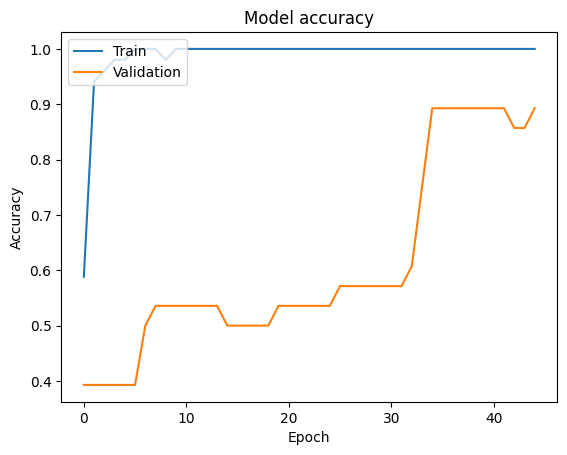

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])  # Plot validation accuracy
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [12]:
model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 172ms/step - loss: 0.2578 - accuracy: 0.8929


[0.2578038275241852, 0.8928571343421936]

In [13]:
model_path = 'best_weights.h5'

# Save the model
model.save(model_path)

print("Model saved successfully.")

Model saved successfully.


1/1 [==============================] - 0s 177ms/step
[[1.7706377e-09]]
Class: 0 Name: mango


/tmp/ipykernel_33/1555716446.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_class = int(my_predicted_image > 0.5)


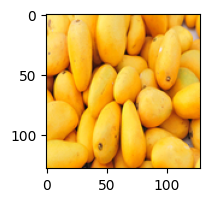

In [14]:
classes = ["mango", "apple"]
from keras.models import load_model
from PIL import Image

fileImage = Image.open("/kaggle/input/fruits-dataset-images/images/mango fruit/Image_13.gif").convert("RGB").resize([IMAGE_WIDTH, IMAGE_HEIGHT], Image.LANCZOS)
image = np.array(fileImage)
myimage = image.reshape(1, IMAGE_WIDTH, IMAGE_HEIGHT, 3)

plt.figure(figsize=(4, 2))
plt.imshow(image)

# Load the saved model
model_path = '/kaggle/working/best_weights.h5'
model = load_model(model_path)

my_predicted_image = model.predict(myimage)
print(my_predicted_image)

# Assuming threshold of 0.5 for binary classification
y_class = int(my_predicted_image > 0.5)
print("Class:", y_class, "Name:", classes[y_class])


1/1 [==============================] - 0s 144ms/step


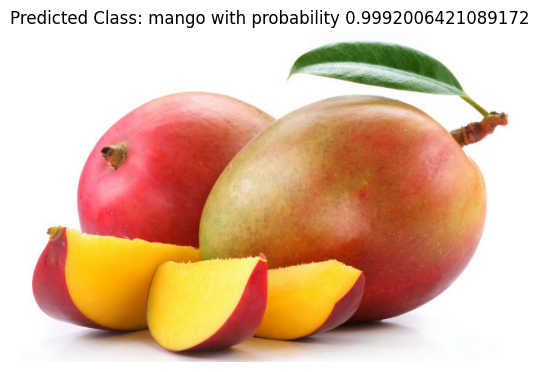

In [15]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.models import load_model

# Load the saved model
model_path = '/kaggle/working/best_weights.h5'
model = load_model(model_path)

# Define the classes
classes = ["mango", "apple"]

# Load and preprocess the image
def preprocess_image(image_path, target_size):
    img = Image.open(image_path).convert("RGB").resize(target_size, Image.LANCZOS)
    img_array = np.array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Path to the unseen image
image_path = "/kaggle/input/test-data/imgs/img4.jpeg"

# Preprocess the image
input_image = preprocess_image(image_path, (128, 128))

# Make predictions
predicted_probabilities = model.predict(input_image)[0]
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class = classes[predicted_class_index]

# Show the image
plt.imshow(Image.open(image_path))
plt.title(f"Predicted Class: {predicted_class} with probability {predicted_probabilities[predicted_class_index]}")
plt.axis('off')
plt.show()

## Scogo - Device vs Rack Classification

In [17]:
images_dir = pathlib.Path('/kaggle/input/scogo-data') 

In [18]:
class_images_dict = {
    'device': list(images_dir.glob('device_images/*')),
    'rack': list(images_dir.glob('rack_images/*'))
}

class_labels_dict = {
    'device': 0,
    'rack': 1
}

In [19]:
class_images_dict['device'][:5]

[PosixPath('/kaggle/input/scogo-data/device_images/45.jpg'),
 PosixPath('/kaggle/input/scogo-data/device_images/56.jpg'),
 PosixPath('/kaggle/input/scogo-data/device_images/89.jpg'),
 PosixPath('/kaggle/input/scogo-data/device_images/20.jpg'),
 PosixPath('/kaggle/input/scogo-data/device_images/58.jpg')]

In [20]:
class_images_dict['rack'][:5]

[PosixPath('/kaggle/input/scogo-data/rack_images/45.jpg'),
 PosixPath('/kaggle/input/scogo-data/rack_images/56.jpg'),
 PosixPath('/kaggle/input/scogo-data/rack_images/20.jpg'),
 PosixPath('/kaggle/input/scogo-data/rack_images/58.jpg'),
 PosixPath('/kaggle/input/scogo-data/rack_images/6.jpg')]

In [22]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_CHANNELS = 3
X, Y = [], []

for class_name, classes in class_images_dict.items():
    print(class_name)
    for image in classes:
        img = cv2.imread(str(image))
        if isinstance(img,type(None)): 
            #print('image not found')
            continue
            
        elif ((img.shape[0] >= IMAGE_HEIGHT) and  (img.shape[1] >=IMAGE_WIDTH)):
            resized_img = cv2.resize(img,(IMAGE_WIDTH,IMAGE_HEIGHT))
            X.append(resized_img)
            Y.append(class_labels_dict[class_name])
        else:
            #print("Invalid Image")
            continue

device
rack


In [23]:
X = np.array(X)
Y = np.array(Y)
X.shape, Y.shape

((264, 128, 128, 3), (264,))

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.7)
print(len(X_train),len(Y_train))
print(len(X_test),len(Y_test))

79 79
185 185


In [25]:
IMAGE_CHANNELS = 3
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 126, 126, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_4 (Bat  (None, 61, 61, 64)       

In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the path where you want to save the best weights
checkpoint_path = 'scogo_best.h5'

# Define the callback to save only the best weights based on validation accuracy
checkpoint = ModelCheckpoint(checkpoint_path, 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True,
                             mode='max')

# Train the model with the callback
history = model.fit(X_train, Y_train,
                    batch_size=32,
                    verbose=1,
                    epochs=45,
                    validation_data=(X_test, Y_test),  # Provide validation data here
                    callbacks=[checkpoint])  # Pass the callback here

Epoch 1/45
3/3 [==============================] - ETA: 0s - loss: 1.2482 - accuracy: 0.6962
Epoch 1: val_accuracy improved from -inf to 0.77838, saving model to scogo_best.h5


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 6s 2s/step - loss: 1.2482 - accuracy: 0.6962 - val_loss: 25.2885 - val_accuracy: 0.7784
Epoch 2/45
3/3 [==============================] - ETA: 0s - loss: 0.0904 - accuracy: 0.9620
Epoch 2: val_accuracy did not improve from 0.77838
3/3 [==============================] - 3s 1s/step - loss: 0.0904 - accuracy: 0.9620 - val_loss: 19.9099 - val_accuracy: 0.7135
Epoch 3/45
3/3 [==============================] - ETA: 0s - loss: 0.0715 - accuracy: 0.9747
Epoch 3: val_accuracy did not improve from 0.77838
3/3 [==============================] - 3s 1s/step - loss: 0.0715 - accuracy: 0.9747 - val_loss: 12.6045 - val_accuracy: 0.7459
Epoch 4/45
3/3 [==============================] - ETA: 0s - loss: 0.0775 - accuracy: 0.9620
Epoch 4: val_accuracy improved from 0.77838 to 0.80541, saving model to scogo_best.h5
3/3 [==============================] - 4s 2s/step - loss: 0.0775 - accuracy: 0.9620 - val_loss: 7.1610 - val_accuracy: 0.8054
Epoch 5/45
3/3 [=============

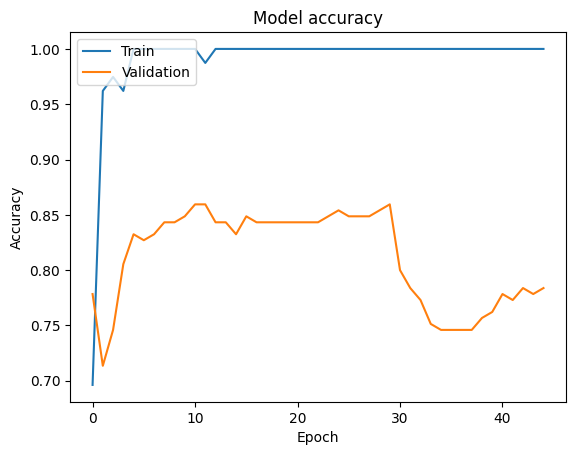

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])  # Plot validation accuracy
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [28]:
model.evaluate(X_test,Y_test)

6/6 [==============================] - 1s 182ms/step - loss: 1.0033 - accuracy: 0.7838


[1.0032802820205688, 0.7837837934494019]

In [33]:
from keras.models import load_model
from PIL import Image

def predict_class(image_path):
    
    classes = ["device", "rack"]
    fileImage = Image.open(image_path).convert("RGB").resize([IMAGE_WIDTH, IMAGE_HEIGHT], Image.LANCZOS)
    image = np.array(fileImage)
    myimage = image.reshape(1, IMAGE_WIDTH, IMAGE_HEIGHT, 3)

    plt.figure(figsize=(4, 2))
    plt.imshow(image)

    # Load the saved model
    model_path = '/kaggle/working/scogo_best.h5'
    model = load_model(model_path)

    my_predicted_image = model.predict(myimage)
    print(my_predicted_image)

    # Assuming threshold of 0.5 for binary classification
    y_class = int(my_predicted_image > 0.5)
    print("Class:", y_class, "Name:", classes[y_class])


1/1 [==============================] - 0s 132ms/step
[[0.99920887]]
Class: 1 Name: rack


/tmp/ipykernel_33/106012970.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_class = int(my_predicted_image > 0.5)


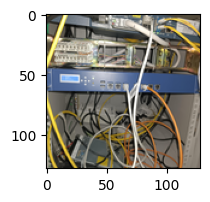

In [34]:
predict_class('/kaggle/input/scogo-data/rack_images/106.jpg')

1/1 [==============================] - 0s 133ms/step
[[1.7245e-15]]
Class: 0 Name: device


/tmp/ipykernel_33/106012970.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_class = int(my_predicted_image > 0.5)


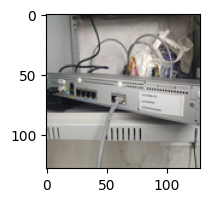

In [35]:
predict_class('/kaggle/input/scogo-data/device_images/11.jpg')